## Removing Artifacts from Image

In [2]:
import cv2
import numpy as np

In [3]:
img = cv2.imread('test/denoised_196488331_HH.png', 0)
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

In [4]:
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if sizes[i] >= 50:   #filter small dotted regions
        img2[labels == i + 1] = 255

res = cv2.bitwise_not(img2)

In [5]:
cv2.imwrite('test/res.png', res)

True

## Space 2

In [1]:
import numpy as np
from PIL import Image, UnidentifiedImageError

In [4]:
img_loc = 'test/denoised_196488331_HH.png'
Image.MAX_IMAGE_PIXELS = None  # Override PIL's DecompressionBombError

In [5]:
img = np.asarray(Image.open(img_loc))

In [6]:
threshold = np.mean(img) + 3*np.std(img)

In [7]:
threshold

194.77685212083296

In [9]:
np.max(img)

255

In [11]:
from scipy import special

M = 10.089038980848645
m = -1.429329123112601
L = 1
c = (1 / 2) * (special.psi(L) - np.log(L))
cn = c / (M - m)  # normalized (0,1) mean of log speckle

In [14]:
special.psi(L)

-0.5772156649015329

In [15]:
c

-0.28860783245076643

In [16]:
cn

-0.02505631265174727

In [17]:
M-m

11.518368103961247

In [20]:
img.shape

(13973, 13431)

In [19]:
def normalize_sar(im):
    return ((np.log(im + np.spacing(1)) - m) * 255 / (M - m)).astype('float32')

In [21]:
img_norm = normalize_sar(img)

In [22]:
img

array([[ 95,  96,  96, ...,  76,  80,  81],
       [100, 103, 101, ...,  84,  86,  92],
       [100, 103, 104, ...,  88,  94,  95],
       ...,
       [ 54,  51,  49, ...,  87,  80,  77],
       [ 53,  50,  48, ...,  90,  87,  77],
       [ 59,  51,  47, ...,  90,  84,  75]], dtype=uint8)

In [23]:
img_norm

array([[132.45952 , 132.69135 , 132.69135 , ..., 127.51945 , 128.655   ,
        128.93002 ],
       [133.59508 , 134.24947 , 133.81537 , ..., 129.73515 , 130.25609 ,
        131.74913 ],
       [133.59508 , 134.24947 , 134.46336 , ..., 130.76503 , 132.22525 ,
        132.45952 ],
       ...,
       [119.95361 , 118.68821 , 117.80254 , ..., 130.51202 , 128.655   ,
        127.808846],
       [119.539795, 118.24981 , 117.34607 , ..., 131.26256 , 130.51202 ,
        127.808846],
       [121.914055, 118.68821 , 116.879974, ..., 131.26256 , 129.73515 ,
        127.22622 ]], dtype=float32)

In [24]:
def denormalize_sar(im):
    return np.exp((M - m) * np.clip((np.squeeze(im)).astype('float32'),0,1) + m)

In [25]:
img_denorm = denormalize_sar(img_norm)

In [26]:
img_denorm

array([[24077.639, 24077.639, 24077.639, ..., 24077.639, 24077.639,
        24077.639],
       [24077.639, 24077.639, 24077.639, ..., 24077.639, 24077.639,
        24077.639],
       [24077.639, 24077.639, 24077.639, ..., 24077.639, 24077.639,
        24077.639],
       ...,
       [24077.639, 24077.639, 24077.639, ..., 24077.639, 24077.639,
        24077.639],
       [24077.639, 24077.639, 24077.639, ..., 24077.639, 24077.639,
        24077.639],
       [24077.639, 24077.639, 24077.639, ..., 24077.639, 24077.639,
        24077.639]], dtype=float32)

In [27]:
img_norm.shape

(13973, 13431)

In [28]:
img_alt = img.astype('float32')

In [29]:
img_alt

array([[ 95.,  96.,  96., ...,  76.,  80.,  81.],
       [100., 103., 101., ...,  84.,  86.,  92.],
       [100., 103., 104., ...,  88.,  94.,  95.],
       ...,
       [ 54.,  51.,  49., ...,  87.,  80.,  77.],
       [ 53.,  50.,  48., ...,  90.,  87.,  77.],
       [ 59.,  51.,  47., ...,  90.,  84.,  75.]], dtype=float32)

In [30]:
M = 10
m = -5
L = 5
c = (1 / 2) * (special.psi(L) - np.log(L))
cn = c / (M - m)  # normalized (0,1) mean of log speckle

In [32]:
cn

-0.0034440081334099998

## Space 3

In [33]:
import cv2 

In [34]:
gray = cv2.imread(img_loc, 0) 

In [35]:
th, threshed = cv2.threshold(gray, 100, 255,  
          cv2.THRESH_BINARY|cv2.THRESH_OTSU) 

In [37]:
threshed

array([[255,   0,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0, 255, 255],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [38]:
cnts = cv2.findContours(threshed, cv2.RETR_LIST,  
                    cv2.CHAIN_APPROX_SIMPLE)[-2] 

In [ ]:
cnts

In [40]:
# filter by area 
s1 = 3
s2 = 20
xcnts = [] 
  
for cnt in cnts: 
    if s1<cv2.contourArea(cnt) <s2: 
        xcnts.append(cnt) 
  
# printing output 
print("\nDots number: {}".format(len(xcnts)))


Dots number: 1025204


In [4]:
img_loc = 'test/sample.png'

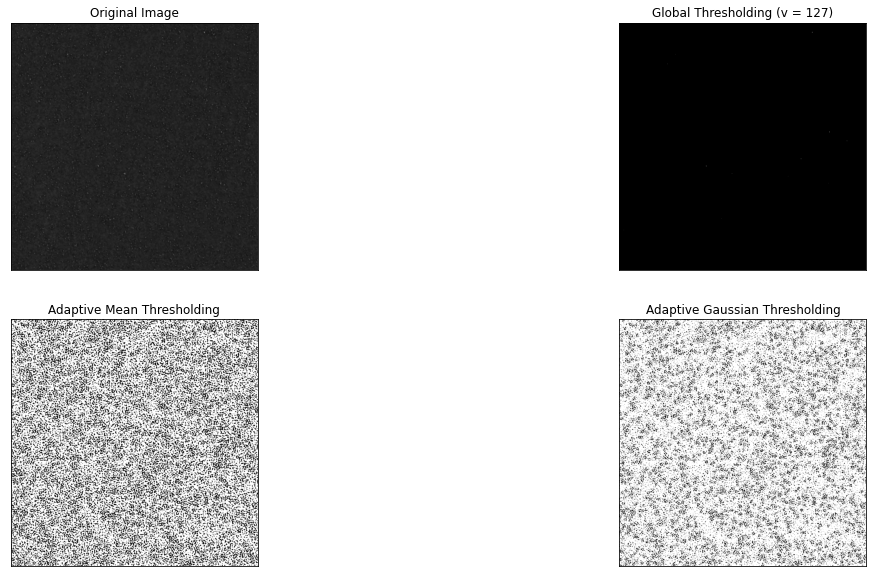

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))

img = cv.imread(img_loc,0)
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

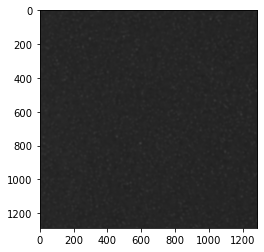

In [48]:
import cv2
import numpy

img = cv2.imread(img_loc)
blur = cv2.GaussianBlur(img,(31,31),0)

filtered = img - blur
filtered = filtered + 127*numpy.ones(img.shape, numpy.uint8)

plt.imshow(blur)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from PIL import Image

def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

# Load the data...
im = Image.open(img_loc)
data = np.array(im, dtype=float)
plot(data, 'Original')

# A very simple and very narrow highpass filter
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
highpass_3x3 = ndimage.convolve(data, kernel)
plot(highpass_3x3, 'Simple 3x3 Highpass')

# A slightly "wider", but sill very simple highpass filter 
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
highpass_5x5 = ndimage.convolve(data, kernel)
plot(highpass_5x5, 'Simple 5x5 Highpass')

# Another way of making a highpass filter is to simply subtract a lowpass
# filtered image from the original. Here, we'll use a simple gaussian filter
# to "blur" (i.e. a lowpass filter) the original.
lowpass = ndimage.gaussian_filter(data, 3)
gauss_highpass = data - lowpass
plot(gauss_highpass, r'Gaussian Highpass, $\sigma = 3 pixels$')

plt.show()

NameError: name 'img_loc' is not defined

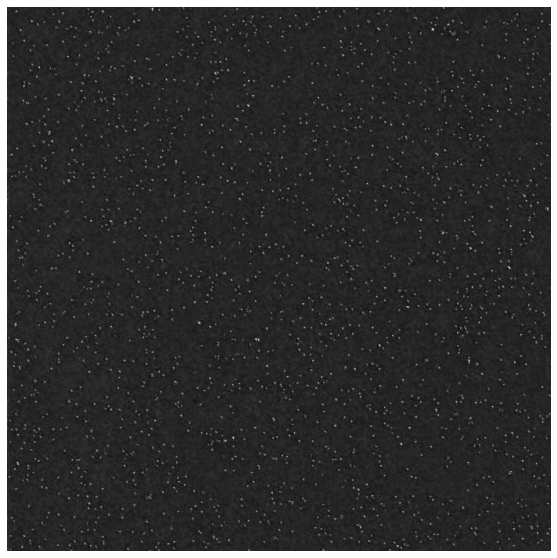

In [5]:
from skimage.io import imread
import matplotlib.pyplot as plt
import scipy.fftpack as fp

im = np.mean(imread(img_loc), axis=2) # assuming an RGB image
plt.figure(figsize=(10,10))
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

<ipython-input-6-ef0a986e6e50>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)


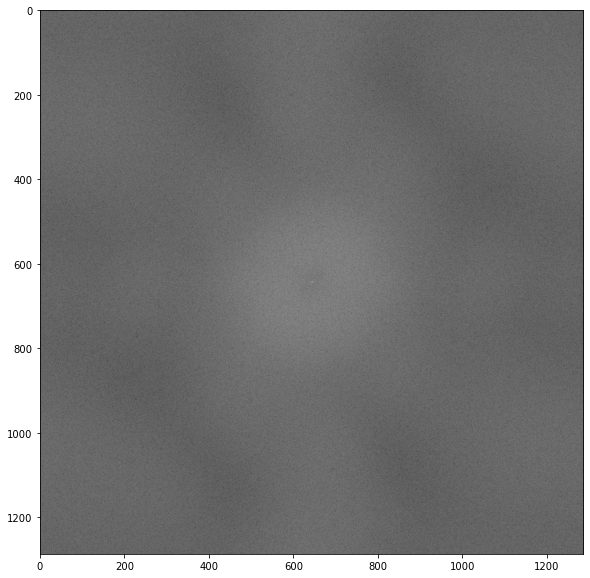

In [6]:
F1 = fp.fft2((im).astype(float))
F2 = fp.fftshift(F1)
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.show()

<ipython-input-7-4744a1ec460d>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + F2)).astype(int))


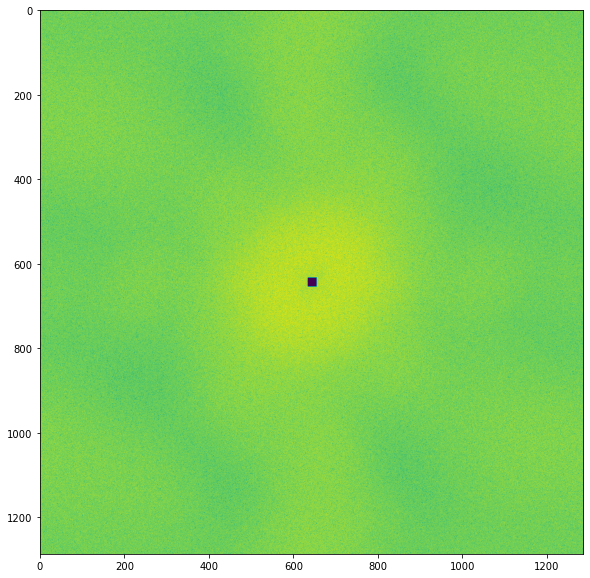

In [7]:
(w, h) = im.shape
half_w, half_h = int(w/2), int(h/2)

# high pass filter
n = 10
F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int))
plt.show()

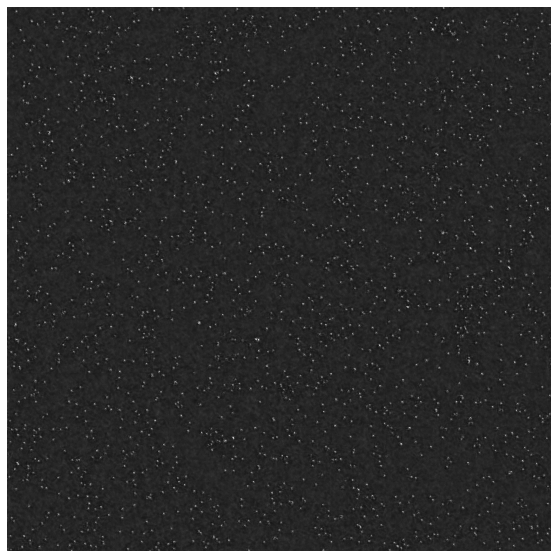

In [8]:
im1 = fp.ifft2(fp.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()

In [122]:
from PIL import Image

im = Image.fromarray(im1).convert('P')
im.save("filtered_02.png")

In [96]:
mask_img = cv.imread('filtered.png', 0)

im = cv.imread(img_loc)
mask = np.uint8(mask_img)

dst = cv.inpaint(im,mask, 3, cv.INPAINT_TELEA)

In [94]:
mask

array([[[  1,   1,   1],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [248, 248, 248],
        [249, 249, 249]],

       [[253, 253, 253],
        [  1,   1,   1],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 251, 251],
        [  0,   0,   0],
        [252, 252, 252],
        ...,
        [252, 252, 252],
        [251, 251, 251],
        [254, 254, 254]],

       ...,

       [[ 13,  13,  13],
        [ 11,  11,  11],
        [250, 250, 250],
        ...,
        [251, 251, 251],
        [248, 248, 248],
        [248, 248, 248]],

       [[ 44,  44,  44],
        [ 19,  19,  19],
        [  6,   6,   6],
        ...,
        [250, 250, 250],
        [248, 248, 248],
        [248, 248, 248]],

       [[ 26,  26,  26],
        [  8,   8,   8],
        [  2,   2,   2],
        ...,
        [252, 252, 252],
        [249, 249, 249],
        [250, 250, 250]]

In [81]:
img_bkp = np.array(im1, dtype=np.uint8)
img_bkp

array([[  1, 255, 255, ..., 253, 248, 249],
       [253,   1, 254, ..., 255, 255, 255],
       [251,   0, 252, ..., 252, 251, 254],
       ...,
       [ 13,  11, 250, ..., 251, 248, 248],
       [ 44,  19,   6, ..., 250, 248, 248],
       [ 26,   8,   2, ..., 252, 249, 250]], dtype=uint8)

In [82]:
im = Image.fromarray(img_bkp).convert('P')
im.save("filtered.png")

In [83]:
im1

array([[ 1.62835366, -1.61286739, -1.74841845, ..., -3.18319465,
        -8.13752907, -7.7903963 ],
       [-3.02879446,  1.29390772, -2.54508275, ..., -1.3581156 ,
        -1.71347175, -1.27608956],
       [-5.39749766, -0.9995467 , -4.03117964, ..., -4.77577746,
        -5.02278217, -2.98457949],
       ...,
       [13.78255707, 11.94070518, -6.25260975, ..., -5.50930312,
        -8.41864393, -8.24633271],
       [44.89076701, 19.06585384,  6.1272649 , ..., -6.02006433,
        -8.12912143, -8.66687226],
       [26.5950345 ,  8.30397751,  2.88478974, ..., -4.24087115,
        -7.03083768, -6.75969564]])

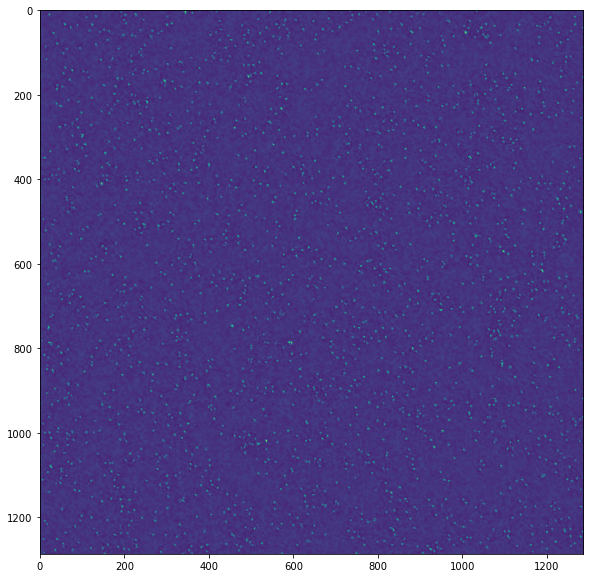

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(im1)

TypeError: 'Image' object is not subscriptable

In [97]:
dst

array([[[43, 43, 43],
        [45, 45, 45],
        [44, 44, 44],
        ...,
        [44, 44, 44],
        [42, 42, 42],
        [43, 43, 43]],

       [[46, 46, 46],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [42, 42, 42],
        [43, 43, 43],
        [42, 42, 42]],

       [[44, 44, 44],
        [42, 42, 42],
        [45, 45, 45],
        ...,
        [44, 44, 44],
        [43, 43, 43],
        [43, 43, 43]],

       ...,

       [[49, 49, 49],
        [55, 55, 55],
        [49, 49, 49],
        ...,
        [41, 41, 41],
        [42, 42, 42],
        [42, 42, 42]],

       [[49, 49, 49],
        [58, 58, 58],
        [51, 51, 51],
        ...,
        [41, 41, 41],
        [42, 42, 42],
        [42, 42, 42]],

       [[55, 55, 55],
        [55, 55, 55],
        [52, 52, 52],
        ...,
        [42, 42, 42],
        [42, 42, 42],
        [41, 41, 41]]], dtype=uint8)

In [98]:
img_dst = Image.fromarray(dst).convert('L')

In [99]:
img_dst.save("final.png")

In [102]:
img_mask = Image.fromarray(mask).convert('L')
img_mask.save("mask.png")

In [3]:
import cv2 as cv

img_open = cv.imread('filtered_02.png', cv.IMREAD_GRAYSCALE)

In [5]:
cv.imshow('test',img_open)

 ...]

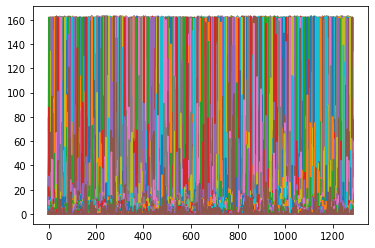

In [4]:
import matplotlib.pyplot as plt

plt.plot(img_open)

In [ ]:
im = cv.imread(img_loc)
# mask = np.uint8(mask_img)

dst = cv.inpaint(im,img_open, 3, cv.INPAINT_TELEA)